In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
pd.options.display.max_columns = None

In [3]:
custom_na_values = ["Sin información", "Sin informacion", 'Na', "Nd", 'No aplica']

# Desaparición

In [11]:
df_desaparicion_casos = pd.read_csv('../../data/memoria_historica/casos_desaparicion.csv', na_values=custom_na_values)

In [12]:
df_desaparicion_casos

,IdCaso,IdCasoRelacionado,DIAH,MESH,ANNOH,REGION,DEPTO_CASO,MUNINICIO_CASO,TipoArmas,Modalidad,PRESUNTO_REPONSABLE,DESCRIPCION_PRESUNTO_RESPONSABLE,AbandonoDespojoForzadoTierras,AmenazaIntimidacion,AtaqueContraMisionMedica,ConfinamientoRestriccionMovilidad,DesplazamientoForzado,Extorsion,Pillaje,LesionadosCiviles,Tortura,ViolenciaBasadaGenero,OtroHechoSimultaneo,NumeroVictimasCaso,Estado
0,9909,NaN,13,1,1996,Uraba,Chocó,Acandí,Artefacto explosivo,Falso positivo,Grupo paramilitar,No identificado,0.0,0,0,0,0,0,0,1.0,0.0,NaN,NaN,1,Publicado
1,36502,NaN,1,10,1996,Occidente antioqueño,Antioquia,Peque,Arma de fuego,Asalto,Grupo paramilitar,No identificado,0.0,0,0,0,0,0,0,0.0,0.0,NaN,NaN,1,Publicado
2,38332,NaN,15,2,1996,Valle de aburra,Antioquia,Medellín,Arma corto punzante,Retención/ejecución,Grupo paramilitar,Autodefensas unidas de colombia auc,0.0,0,0,0,0,0,0,0.0,0.0,NaN,NaN,1,Publicado
3,45348,NaN,24,8,2001,Nordeste antioqueño,Antioquia,Cisneros,NaN,Retención/ejecución,Grupo paramilitar,Autodefensas unidas de colombia auc,0.0,1,0,0,1,0,0,0.0,1.0,NaN,NaN,3,Publicado
4,47036,NaN,30,8,2002,Valle de aburra,Antioquia,Medellín,Arma corto punzante,Retención,Grupo paramilitar,Autodefensas unidas de colombia auc,0.0,1,0,0,0,0,0,0.0,0.0,NaN,NaN,1,Publicado
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68426,532486,NaN,28,12,2004,Valle de aburra,Antioquia,Medellín,Arma de fuego,Retención/ejecución,Grupo paramilitar,Autodefensas unidas de colombia auc,0.0,0,0,0,0,0,0,NaN,1.0,NaN,Ocultamiento del cadáver,1,Publicado
68427,532487,NaN,5,5,2005,Sur del valle,Valle del cauca,Cali,NaN,Desconocida,Desconocido,NaN,0.0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,1,Publicado
68428,532491,NaN,0,0,2001,NaN,NaN,NaN,NaN,Desconocida,Grupo paramilitar,Autodefensas unidas de colombia auc,0.0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,1,Publicado
68429,532492,NaN,2,7,2000,Oriente antioqueño,Antioquia,San carlos,NaN,Desconocida,Grupo paramilitar,Autodefensas unidas de colombia auc,0.0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,1,Publicado


In [13]:
df_desaparicion = pd.read_csv('../../data/memoria_historica/victimas_desaparicion.csv', na_values=custom_na_values)
df_desaparicion = df_desaparicion.merge(df_desaparicion_casos[['TipoArmas', 'Modalidad', 'PRESUNTO_REPONSABLE', 'IdCaso']],
                                       how="left", on="IdCaso")

In [104]:
df_desaparicion["ANNOH"] = df_desaparicion.ANNOH.replace({0: np.nan}).astype("Int64")
df_desaparicion["COD_DANE_MUN"] = df_desaparicion.COD_DANE_MUN.apply(try_parse_integer).astype("Int64")

In [14]:
df_desaparicion

,IdCaso,Id,DIAH,MESH,ANNOH,COD_DANE_MUN,DEPTO_CASO,MUNINICIO_CASO,Sexo,Etnia,OcupacionVictima,CalidadVictima,TipoPoblacionVulnerable,MilitantePolitico,Grupo,DESCRIPCION_GRUPO,SituacionActualVictima,FuenteInformacionDesaparicion,Estado,TipoArmas,Modalidad,PRESUNTO_REPONSABLE
0,9909,17255.0,13,1,1996,27006,Chocó,Acandí,H,NaN,NaN,Civil,NaN,NaN,NaN,NaN,Sigue desaparecido pero existe información,Familiares o comunidad,Publicado,Artefacto explosivo,Falso positivo,Grupo paramilitar
1,532407,36659.0,4,9,2003,5647,Antioquia,San andrés de cuerquía,H,NaN,Trabajador de finca,Civil,NaN,NaN,NaN,NaN,Sigue desaparecido pero existe información,Familiares o comunidad,Publicado,Arma de fuego - objeto contundente,Persecución,Grupo paramilitar
2,181823,48561.0,30,3,2003,17777,Caldas,Supía,H,Indígena,NaN,Civil,NaN,NaN,NaN,NaN,Apareció muerto,Ong,Publicado,NaN,Interceptación,Grupo paramilitar
3,106281,61537.0,14,1,2004,47001,Magdalena,Santa marta,H,NaN,Paramilitar,Combatiente,NaN,NaN,Grupo paramilitar,Autodefensas unidas de colombia auc,Sigue desaparecido pero existe información,Perpetrador del hecho,Publicado,Arma de fuego,Citación,Grupo paramilitar
4,106281,61538.0,14,1,2004,47001,Magdalena,Santa marta,H,NaN,Paramilitar,Combatiente,NaN,NaN,Grupo paramilitar,Autodefensas unidas de colombia auc,Sigue desaparecido pero existe información,Perpetrador del hecho,Publicado,Arma de fuego,Citación,Grupo paramilitar
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80467,245548,580460.0,20,5,2000,47675,Magdalena,Salamina,H,NaN,NaN,Civil,NaN,NaN,NaN,NaN,Apareció muerto,Familiares o comunidad,Publicado,Arma corto punzante,Asalto,Grupo armado no identificado
80468,245548,580462.0,20,5,2000,47675,Magdalena,Salamina,H,NaN,NaN,Civil,NaN,NaN,NaN,NaN,Apareció muerto,Familiares o comunidad,Publicado,Arma corto punzante,Asalto,Grupo armado no identificado
80469,245650,580463.0,28,5,2000,52378,Nariño,La cruz,H,NaN,Fuerza pública,Combatiente,NaN,NaN,Agente del estado,Policía nacional,Desaparecido,NaN,Publicado,Arma de fuego - artefacto explosivo,Retención,Guerrilla
80470,245650,580464.0,28,5,2000,52378,Nariño,La cruz,H,NaN,Fuerza pública,Combatiente,NaN,NaN,Agente del estado,Policía nacional,Desaparecido,NaN,Publicado,Arma de fuego - artefacto explosivo,Retención,Guerrilla


In [15]:
df_desaparicion.isna().mean()

IdCaso                           0.000000
Id                               0.000012
DIAH                             0.000000
MESH                             0.000000
ANNOH                            0.000000
COD_DANE_MUN                     0.000000
DEPTO_CASO                       0.044512
MUNINICIO_CASO                   0.048390
Sexo                             0.000174
Etnia                            0.985747
OcupacionVictima                 0.678658
CalidadVictima                   0.000075
TipoPoblacionVulnerable          0.949734
MilitantePolitico                0.991413
Grupo                            0.984852
DESCRIPCION_GRUPO                0.984951
SituacionActualVictima           0.000000
FuenteInformacionDesaparicion    0.785279
Estado                           0.000000
TipoArmas                        0.925465
Modalidad                        0.000000
PRESUNTO_REPONSABLE              0.000000
dtype: float64

In [19]:
df_desaparicion.pivot_table("Id", "Grupo", "CalidadVictima", aggfunc="count")

CalidadVictima,Combatiente
Grupo,
Agente del estado,658
Agente extranjero,2
Grupo paramilitar,453
Grupo posdesmovilización,1
Guerrilla,103
Otro,1


In [23]:
df_desaparicion.pivot_table("Id", "Grupo", "SituacionActualVictima", aggfunc="count", fill_value=0)

SituacionActualVictima,Apareció muerto,Apareció vivo,Desaparecido,Sigue desaparecido pero existe información
Grupo,,,,
Agente del estado,57,2,532,67
Agente extranjero,0,0,2,0
Grupo paramilitar,77,5,99,273
Grupo posdesmovilización,0,0,1,0
Guerrilla,11,2,30,60
Otro,0,0,0,1


In [27]:
df_desaparicion.pivot_table("Id", "Grupo", "FuenteInformacionDesaparicion", aggfunc="count", fill_value=0)

FuenteInformacionDesaparicion,Anónima,Entidad pública,Familiares o comunidad,Perpetrador del hecho
Grupo,,,,
Agente del estado,4,36,40,40
Grupo paramilitar,8,59,78,160
Guerrilla,1,1,21,39
Otro,0,0,1,0


In [26]:
df_desaparicion.pivot_table("Id", "Grupo", "Modalidad", aggfunc="count", fill_value=0)

Modalidad,Asalto,Asesinato circunstancial,Ataque indiscriminado,Atentado,Citación,Desconocida,Engaño,Falso positivo,Incursión,Interceptación,Otro,Retención,Retención/ejecución,Retén
Grupo,,,,,,,,,,,,,,
Agente del estado,22,0,0,2,6,418,3,0,10,27,69,70,11,20
Agente extranjero,0,0,0,0,0,2,0,0,0,0,0,0,0,0
Grupo paramilitar,31,1,1,1,41,224,31,1,1,14,11,67,30,0
Grupo posdesmovilización,0,0,0,0,0,0,0,0,0,0,0,0,1,0
Guerrilla,8,0,0,0,1,43,3,2,1,5,12,15,10,3
Otro,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [28]:
df_desaparicion.pivot_table("Id", "Grupo", "PRESUNTO_REPONSABLE", aggfunc="count", fill_value=0)

PRESUNTO_REPONSABLE,Agente del estado,Agente del estado - grupo paramilitar,Bandolerismo,Desconocido,Grupo armado no dirimido,Grupo armado no identificado,Grupo paramilitar,Grupo posdesmovilización,Guerrilla
Grupo,,,,,,,,,
Agente del estado,19,3,1,113,0,50,97,0,375
Agente extranjero,0,0,0,0,0,0,0,0,2
Grupo paramilitar,1,2,2,43,3,15,377,1,10
Grupo posdesmovilización,1,0,0,0,0,0,0,0,0
Guerrilla,17,4,0,6,1,2,33,0,40
Otro,0,0,0,0,0,0,1,0,0


In [29]:
df_desaparicion.pivot_table("Id", "Grupo", "TipoArmas", aggfunc="count", fill_value=0)

TipoArmas,Arma corto punzante,Arma corto punzante - arma de fuego,Arma corto punzante - uso de químicos y tóxicos,Arma de fuego,Arma de fuego - artefacto explosivo,Arma de fuego - material incendiario,Artefacto explosivo,Asfixia mecánica,Material incendiario,Objeto contundente
Grupo,,,,,,,,,,
Agente del estado,3,1,0,62,23,0,37,0,2,1
Grupo paramilitar,9,8,1,87,0,1,0,1,0,0
Guerrilla,1,4,0,21,1,0,0,1,0,0
Otro,0,0,0,1,0,0,0,0,0,0


In [30]:
df_desaparicion.pivot_table("Id", "Grupo", "DESCRIPCION_GRUPO", aggfunc="count", fill_value=0)

DESCRIPCION_GRUPO,Armada nacional,Autodefensas campesinas de córdoba y urabá (accu),Autodefensas campesinas de meta y vichada,Autodefensas campesinas del casanare (buitragueños),Autodefensas campesinas del magdalena medio,Autodefensas campesinas del sur del cesar,Autodefensas de hernán giraldo,Autodefensas unidas de colombia auc,Bloque central bolívar,Das,Disidencia epl,Ecuatoriano,Ejército nacional,Ejército nacional - civiles,Ejército nacional - fuerza aérea,Eln,Epl,Erg,Farc,Fuerza aérea,Infantería de marina,M-19,No identificada,No identificado,Otra,Otra disidencia,Otro,Policía nacional
Grupo,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Agente del estado,2,0,0,0,0,0,0,0,0,8,0,0,432,1,1,0,0,0,0,4,17,0,0,24,0,0,0,169
Agente extranjero,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Grupo paramilitar,0,2,8,6,37,1,2,206,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,174,0,0,10,0
Grupo posdesmovilización,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
Guerrilla,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,10,5,3,27,0,0,14,32,0,1,1,0,0


In [31]:
df_desaparicion.pivot_table("Id", "Grupo", "OcupacionVictima", aggfunc="count", fill_value=0)

OcupacionVictima,Conductor/motorista,Empleado,Fuerza pública,Guerrillero,Miembro de grupo posdesmovilización,Paramilitar
Grupo,,,,,,
Agente del estado,0,0,657,0,0,0
Agente extranjero,0,0,2,0,0,0
Grupo paramilitar,1,0,0,0,0,449
Grupo posdesmovilización,0,0,0,0,1,0
Guerrilla,0,2,0,97,0,0
Otro,0,0,0,1,0,0


In [35]:
df_desaparicion_casos.REGION.value_counts()[20:40]

Occidente antioqueño             1019
Area metropolitana de bogota      978
Altillanura                       972
Centro del valle                  950
Norte de antioquia                946
Atrato                            821
Caguan                            819
Norte del tolima                  793
Area metropolitana de cucuta      737
Cienaga grande de santa marta     697
Altiplano cundiboyacense          659
Provincia de soto                 653
Norte del cauca                   620
Canal del dique                   557
Sur del tolima                    537
Llanos orientales                 492
Norte del valle                   479
Norte de atlantico                458
Patia                             440
Medio putumayo                    434
Name: REGION, dtype: int64

# MAP - MUSE

In [84]:
df_map_casos = pd.read_csv('../../data/memoria_historica/casos_map_muse.csv', na_values=custom_na_values)
df_map_casos["ANNOH"] = df_map_casos.ANNOH.replace({0: np.nan}).astype("Int64")

In [85]:
df_map_casos

,IdCaso,IdCasoRelacionado,DIAH,MESH,ANNOH,REGION,DEPTO_CASO,MUNINICIO_CASO,Modalidad,NombreTipoEvento,TipoArmas,PRESUNTO_REPONSABLE1,DESCRIPCION_PRESUNTO_RESPONSABLE1,AbandonoDespojoForzadoTierras,AmenazaIntimidacion,AtaqueContraMisionMedica,ConfinamientoRestriccionMovilidad,DesplazamientoForzado,Extorsion,LesionadosCiviles,Pillaje,Tortura,ViolenciaBasadaGenero,OtroHechoSimultaneo,T_CICOLE,TotalCivilesMuertos,TotalCombatientesMuertos,TotalCivilesCombatientesMuertos,NumeroVictimasCaso,Estado
0,12200,Cr201712202,18,3,1998,Valle de aburra,Antioquia,Medellín,Atentado,Atentado por map,Minas antipersonal (map),Guerrilla,Eln,0,0,0,1,0,0,0.0,0,0.0,NaN,NaN,NaN,0.0,1.0,1,1,Publicado
1,23137,Cr201723137,26,9,2004,Florencia y area de influencia,Caquetá,Milán,Incidente,Producción de minas,Minas antipersonal (map),Guerrilla,Farc,0,0,0,0,0,0,0.0,0,0.0,NaN,NaN,NaN,2.0,0.0,2,2,Publicado
2,30097,NaN,29,4,2012,Norte del huila,Huila,Colombia,Atentado,Atentado por map,Minas antipersonal (map),Guerrilla,Farc,0,0,0,0,0,0,0.0,0,0.0,NaN,NaN,NaN,0.0,1.0,1,1,Publicado
3,55347,NaN,5,10,2005,Oriente antioqueño,Antioquia,Argelia,Atentado,Atentado por map,Artefacto explosivo,Guerrilla,No identificada,0,1,0,0,0,0,0.0,0,0.0,NaN,NaN,NaN,1.0,NaN,1,1,Publicado
4,66820,Cr018278,7,5,2004,Oriente antioqueño,Antioquia,Concepción,Atentado,Atentado por aie,Artefacto explosivo,Desconocido,NaN,0,0,0,0,0,0,0.0,0,0.0,NaN,NaN,NaN,2.0,NaN,2,2,Publicado
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8947,521971,NaN,10,2,2009,Ariari guayabero,Meta,Mesetas,Atentado,Atentado por map,Minas antipersonal (map),Desconocido,NaN,0,0,0,0,0,0,NaN,0,NaN,NaN,NaN,0.0,0.0,0.0,3,3,Publicado
8948,532493,NaN,5,9,1997,Nordeste antioqueño,Antioquia,Anorí,Atentado,Atentado por map,Minas antipersonal (map),Guerrilla,Eln,0,0,0,0,0,0,NaN,0,NaN,NaN,NaN,3.0,0.0,0.0,3,3,Publicado
8949,532494,NaN,12,10,2010,NaN,Nariño,NaN,Atentado,Atentado por map,Minas antipersonal (map),Grupo armado no identificado,NaN,0,0,0,0,0,0,NaN,0,NaN,NaN,NaN,4.0,0.0,0.0,8,8,Publicado
8950,532495,NaN,1,4,2017,Atrato,Chocó,Riosucio,Atentado,Atentado por map,Minas antipersonal (map),Grupo armado no identificado,NaN,0,0,0,0,0,0,NaN,0,NaN,NaN,NaN,1.0,0.0,0.0,1,1,Publicado


<AxesSubplot:xlabel='ANNOH'>

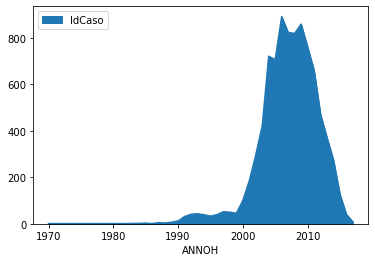

In [86]:
df_map_casos.groupby(["ANNOH"]).agg({"IdCaso" : "count"}).reset_index().plot.area(x="ANNOH", y="IdCaso")

In [87]:
df_map_casos.pivot_table("IdCaso", "Modalidad", "NombreTipoEvento", aggfunc="count", fill_value=0)

NombreTipoEvento,Afectación por muse,Arsenal almacenado,Atentado por aie,Atentado por map,Desminado militar en operaciones,Incautaciones,Municiones sin explotar,Producción de minas,Sospecha de campo minado
Modalidad,,,,,,,,,
Afectación,126,0,0,0,0,0,0,0,0
Atentado,0,0,22,5420,0,0,0,0,0
Incidente,0,1,0,0,6,3,9,2,1


In [88]:
df_map_casos.pivot_table("IdCaso", "Modalidad", "TipoArmas", aggfunc="count", fill_value=0)

TipoArmas,Artefacto explosivo,Artefactos explosivos improvisados (aei),Minas antipersonal (map),Municiones sin explotar (muse),Otro
Modalidad,,,,,
Afectación,7,5,10,106,0
Atentado,101,19,5349,2,1
Incidente,2,3,14,4,0


In [89]:
df_map = pd.read_csv('../../data/memoria_historica/victimas_map_muse.csv', na_values=custom_na_values)
df_map

,IdCaso,Id,DIAH,MESH,ANNOH,COD_DANE_MUN,DEPTO_CASO,MUNINICIO_CASO,Sexo,Etnia,OcupacionVictima,CalidadVictima,TipoPoblacionVulnerable,Grupo,DESCRIPCION_GRUPO,SituacionActualVictima,AfectacionHeridos,CircunstanciaMuerteVictima,ActividadDesarrolladaMomentoAfectacion,Estado
0,12200,20567,18,3,1998,5001,Antioquia,Medellín,H,NaN,Fuerza pública,Combatiente,NaN,Agente del estado,Ejército nacional,Muerta,NaN,NaN,Operaciones militares,Publicado
1,445045,23449,20,10,1990,44420,La guajira,La jagua del pilar,H,NaN,NaN,Civil,NaN,NaN,NaN,Muerta,NaN,Murió en el lugar de los hechos,Operaciones militares,Publicado
2,23137,38302,26,9,2004,18460,Caquetá,Milán,H,NaN,Campesino,Civil,NaN,NaN,NaN,Muerta,NaN,Murió en el lugar de los hechos,Tránsito por trocha o camino,Publicado
3,23137,38303,26,9,2004,18460,Caquetá,Milán,H,NaN,Campesino,Civil,NaN,NaN,NaN,Muerta,NaN,Murió en el lugar de los hechos,Tránsito por trocha o camino,Publicado
4,446886,40537,3,8,2006,73168,Tolima,Chaparral,H,NaN,Fuerza pública,Combatiente,NaN,Agente del estado,Ejército nacional,Muerta,NaN,Murió en el lugar de los hechos,Operaciones militares,Publicado
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9618,532502,580483,22,3,2004,19821,Cauca,Toribío,H,NaN,Fuerza pública,Combatiente,NaN,Agente del estado,Ejército nacional,NaN,NaN,NaN,Operaciones militares,Publicado
9619,532502,580484,22,3,2004,19821,Cauca,Toribío,H,NaN,Fuerza pública,Combatiente,NaN,Agente del estado,Ejército nacional,NaN,NaN,NaN,Operaciones militares,Publicado
9620,532502,580485,22,3,2004,19821,Cauca,Toribío,H,NaN,Fuerza pública,Combatiente,NaN,Agente del estado,Ejército nacional,NaN,NaN,NaN,Operaciones militares,Publicado
9621,532502,580487,22,3,2004,19821,Cauca,Toribío,H,NaN,Fuerza pública,Combatiente,NaN,Agente del estado,Ejército nacional,NaN,NaN,NaN,Operaciones militares,Publicado


In [90]:
def try_parse_integer(code_mun):
    try:
        code_mun = int(code_mun)
        if code_mun==0:
            return np.nan
        else:
            return code_mun
    except Exception:
        return np.nan
    
df_map_casos = df_map_casos.merge(df_map.groupby("IdCaso").agg({"COD_DANE_MUN": "max"}).reset_index(), how="left", on="IdCaso")
df_map_casos["COD_DANE_MUN"] = df_map_casos["COD_DANE_MUN"].apply(try_parse_integer).astype("Int64")

In [91]:
df_map_casos

,IdCaso,IdCasoRelacionado,DIAH,MESH,ANNOH,REGION,DEPTO_CASO,MUNINICIO_CASO,Modalidad,NombreTipoEvento,TipoArmas,PRESUNTO_REPONSABLE1,DESCRIPCION_PRESUNTO_RESPONSABLE1,AbandonoDespojoForzadoTierras,AmenazaIntimidacion,AtaqueContraMisionMedica,ConfinamientoRestriccionMovilidad,DesplazamientoForzado,Extorsion,LesionadosCiviles,Pillaje,Tortura,ViolenciaBasadaGenero,OtroHechoSimultaneo,T_CICOLE,TotalCivilesMuertos,TotalCombatientesMuertos,TotalCivilesCombatientesMuertos,NumeroVictimasCaso,Estado,COD_DANE_MUN
0,12200,Cr201712202,18,3,1998,Valle de aburra,Antioquia,Medellín,Atentado,Atentado por map,Minas antipersonal (map),Guerrilla,Eln,0,0,0,1,0,0,0.0,0,0.0,NaN,NaN,NaN,0.0,1.0,1,1,Publicado,5001
1,23137,Cr201723137,26,9,2004,Florencia y area de influencia,Caquetá,Milán,Incidente,Producción de minas,Minas antipersonal (map),Guerrilla,Farc,0,0,0,0,0,0,0.0,0,0.0,NaN,NaN,NaN,2.0,0.0,2,2,Publicado,18460
2,30097,NaN,29,4,2012,Norte del huila,Huila,Colombia,Atentado,Atentado por map,Minas antipersonal (map),Guerrilla,Farc,0,0,0,0,0,0,0.0,0,0.0,NaN,NaN,NaN,0.0,1.0,1,1,Publicado,41206
3,55347,NaN,5,10,2005,Oriente antioqueño,Antioquia,Argelia,Atentado,Atentado por map,Artefacto explosivo,Guerrilla,No identificada,0,1,0,0,0,0,0.0,0,0.0,NaN,NaN,NaN,1.0,NaN,1,1,Publicado,5055
4,66820,Cr018278,7,5,2004,Oriente antioqueño,Antioquia,Concepción,Atentado,Atentado por aie,Artefacto explosivo,Desconocido,NaN,0,0,0,0,0,0,0.0,0,0.0,NaN,NaN,NaN,2.0,NaN,2,2,Publicado,5206
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8947,521971,NaN,10,2,2009,Ariari guayabero,Meta,Mesetas,Atentado,Atentado por map,Minas antipersonal (map),Desconocido,NaN,0,0,0,0,0,0,NaN,0,NaN,NaN,NaN,0.0,0.0,0.0,3,3,Publicado,50330
8948,532493,NaN,5,9,1997,Nordeste antioqueño,Antioquia,Anorí,Atentado,Atentado por map,Minas antipersonal (map),Guerrilla,Eln,0,0,0,0,0,0,NaN,0,NaN,NaN,NaN,3.0,0.0,0.0,3,3,Publicado,5040
8949,532494,NaN,12,10,2010,NaN,Nariño,NaN,Atentado,Atentado por map,Minas antipersonal (map),Grupo armado no identificado,NaN,0,0,0,0,0,0,NaN,0,NaN,NaN,NaN,4.0,0.0,0.0,8,8,Publicado,52000
8950,532495,NaN,1,4,2017,Atrato,Chocó,Riosucio,Atentado,Atentado por map,Minas antipersonal (map),Grupo armado no identificado,NaN,0,0,0,0,0,0,NaN,0,NaN,NaN,NaN,1.0,0.0,0.0,1,1,Publicado,27615


# Agregación por Municipios

In [101]:
df_map_mun = df_map_casos.groupby(["Modalidad", "COD_DANE_MUN"]).agg({"IdCaso": "count"}).reset_index().rename({"IdCaso": "Casos", "Modalidad":"Tipo_Evento"}, axis="columns")
df_map_mun["Tipo_Evento"] = df_map_mun["Tipo_Evento"].replace({'Afectación': "Munición sin Explotar", 'Atentado': 'Explosión mina antipersonal'})
df_map_mun.drop(df_map_mun[df_map_mun["Tipo_Evento"]=="Incidente"].index, inplace=True)
df_map_mun

,Tipo_Evento,COD_DANE_MUN,Casos
0,Munición sin Explotar,5001,4
1,Munición sin Explotar,5042,1
2,Munición sin Explotar,5045,2
3,Munición sin Explotar,5055,1
4,Munición sin Explotar,5138,4
...,...,...,...
488,Explosión mina antipersonal,95025,8
489,Explosión mina antipersonal,95200,24
490,Explosión mina antipersonal,97001,10
491,Explosión mina antipersonal,97161,7


In [106]:
df_desaparicion_mun = df_desaparicion.groupby("COD_DANE_MUN") \
    .agg({"IdCaso": "count"}).reset_index().rename({"IdCaso": "Casos"}, axis="columns")
df_desaparicion_mun["Tipo_Evento"] = "Desaparicion"
df_desaparicion_mun

,COD_DANE_MUN,Casos,Tipo_Evento
0,5000,68,Desaparicion
1,5001,2977,Desaparicion
2,5002,69,Desaparicion
3,5004,9,Desaparicion
4,5021,32,Desaparicion
...,...,...,...
1029,99000,5,Desaparicion
1030,99001,77,Desaparicion
1031,99524,50,Desaparicion
1032,99624,16,Desaparicion


In [121]:
df_mun = pd.concat([df_desaparicion_mun, df_map_mun]).pivot_table("Casos", "COD_DANE_MUN", "Tipo_Evento", fill_value=0)
df_mun

Tipo_Evento,Desaparicion,Explosión mina antipersonal,Munición sin Explotar
COD_DANE_MUN,,,
5000,68,0,0
5001,2977,4,4
5002,69,3,0
5004,9,0,0
5021,32,5,0
...,...,...,...
99000,5,0,0
99001,77,0,0
99524,50,0,0


<AxesSubplot:xlabel='Desaparicion', ylabel='Explosión mina antipersonal'>

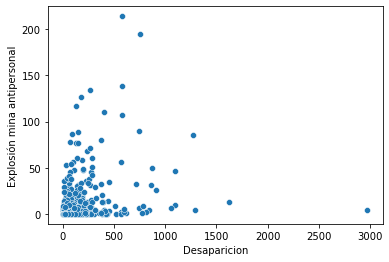

In [123]:
sns.scatterplot(data=df_mun, x="Desaparicion", y="Explosión mina antipersonal")

<AxesSubplot:xlabel='Desaparicion', ylabel='Munición sin Explotar'>

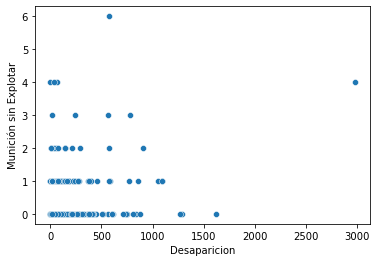

In [125]:
sns.scatterplot(data=df_mun, x="Desaparicion", y="Munición sin Explotar")

<AxesSubplot:xlabel='Explosión mina antipersonal', ylabel='Munición sin Explotar'>

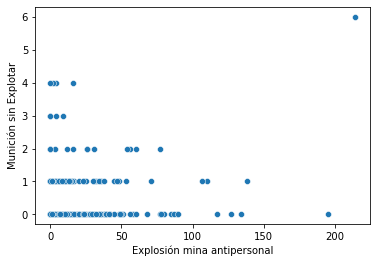

In [126]:
sns.scatterplot(data=df_mun, x="Explosión mina antipersonal", y="Munición sin Explotar")

# Ideas
- Clustering, Correlación, etc por municipios
- Uso de tipos de armas por lugar y tiempo